<a href="https://colab.research.google.com/github/TAUforPython/denoising/blob/main/%D0%B4%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D1%8B%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%9A%D0%B0%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://journal.sketchingscience.org/users/86023/articles/114133-алгоритмы-локации-и-маршрутизации-алгоритм-калмана-басимов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# intial parameters
n_iter = 60
sz = (n_iter,) # size of array

In [33]:
# kalman filter
xOpt = np.zeros(sz)
x_clean = np.zeros(sz)
x = np.zeros(sz)
y = np.zeros(sz)
Kkalman = np.zeros(sz)
eOpt = np.zeros(sz)
sigmaPsi = 1.01
sigmaEta = 1.01

eOpt[0] = sigmaEta

for k in range(1, n_iter):
  x_clean [k]= +1 * x_clean[k-1] + np.sin(k*np.pi*2/20)
  x[k] = +1 * x[k-1] + np.sin(k*np.pi*2/20) + np.random.normal(0,sigmaPsi)
  y[k] = 1 * x[k] + np.random.normal(0,sigmaEta)
  eOpt[k] = ((sigmaEta**2)*((eOpt[k-1])**2+sigmaPsi**2)/(sigmaEta**2+(eOpt[k-1])**2+sigmaPsi**2))**(0.5)
  Kkalman[k] = (eOpt[k])**2/sigmaEta**2
  # x = a * x + b * u + Psi
  # y = c * x + Eta
  xOpt[k] = (+1 * x[k-1] + np.sin(k*np.pi*2/20)) * (1 - Kkalman[k]) + Kkalman[k] * (y[k])


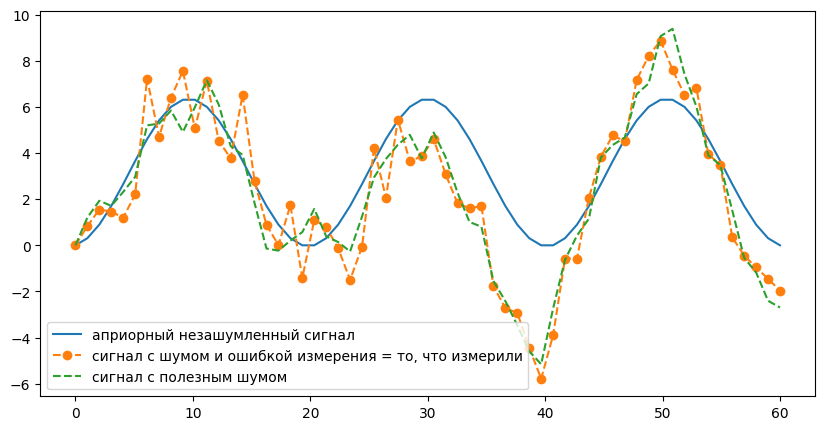

In [34]:
t = np.linspace(0,sz,n_iter)
plt.plot(t, x_clean, label='априорный незашумленный сигнал')
plt.plot(t, y, 'o--', label = 'сигнал с шумом и ошибкой измерения = то, что измерили')
plt.plot(t, x, '--', label = 'сигнал с полезным шумом')
plt.legend()
plt.show()

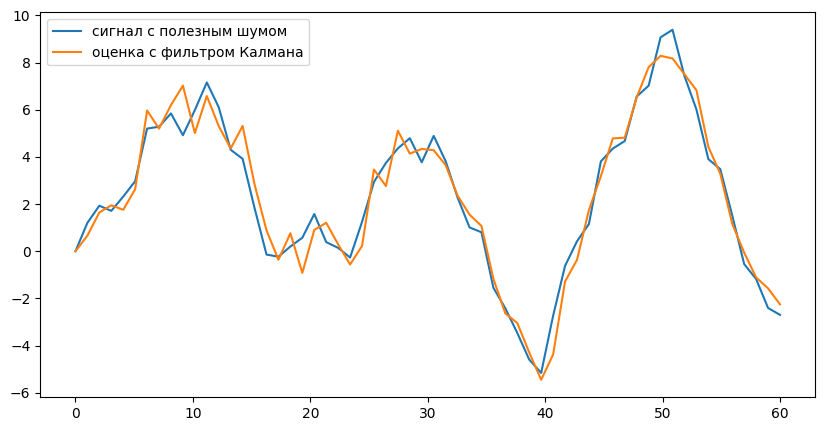

In [35]:
plt.plot(t, x, label = 'сигнал с полезным шумом')
plt.plot(t, xOpt, label = 'оценка с фильтром Калмана')
plt.legend()
plt.show()

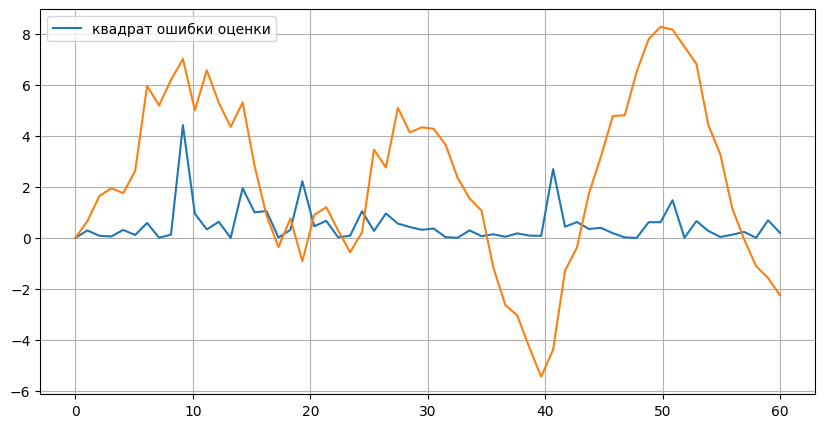

In [36]:
plt.plot(t, (x - xOpt)**2, label = 'квадрат ошибки оценки')
plt.plot(t, xOpt)
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'такт дискретной системы')

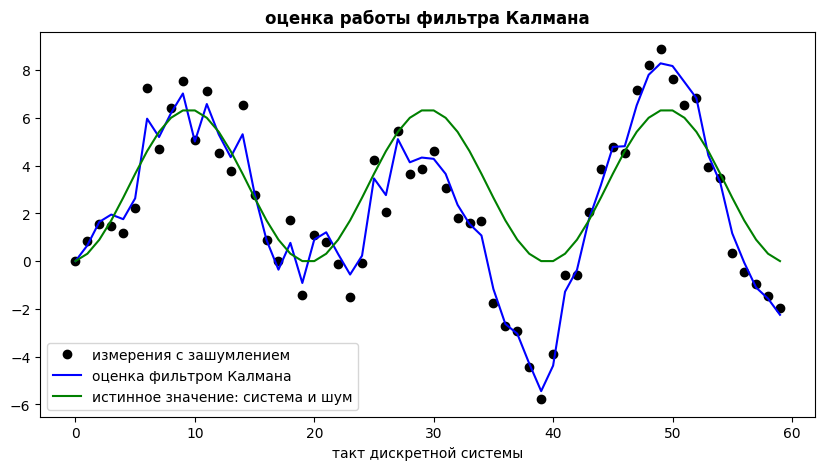

In [37]:
plt.figure()
plt.plot(y,'ko',label='измерения с зашумлением')
plt.plot(xOpt,'b-',label='оценка фильтром Калмана')
plt.plot(x_clean, color='g',label='истинное значение: система и шум')
plt.legend()
plt.title('оценка работы фильтра Калмана', fontweight='bold')
plt.xlabel('такт дискретной системы')


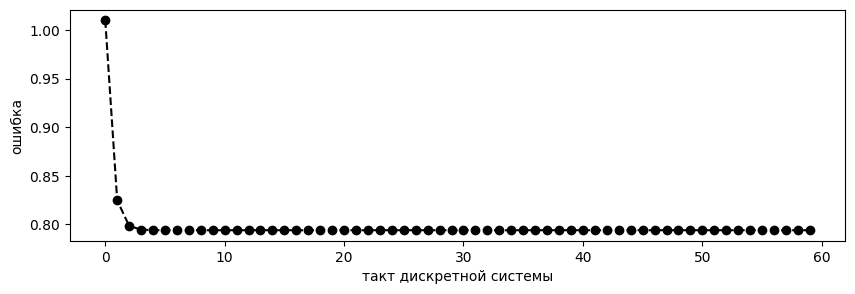

In [41]:
plt.figure(figsize=(10, 3))
plt.plot(eOpt,'ko--',label='ошибка оценки фильтром Калмана')
plt.xlabel('такт дискретной системы')
plt.ylabel('ошибка')
plt.show()